# Import Modules

In [1]:
import pandas as pd
import numpy as np
import emoji
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import pipeline
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Import Data

In [2]:
df = pd.read_csv('tweets.csv')

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3887519479.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets.csv')


user_name  \
0                     Bohmle   
1                        NaN   
2               Dan Bruno AI   
3            Georgiana Comsa   
4               Bitone Great   
...                      ...   
3412806     (I)(AM)(T)(MOYO)   
3412807                Green   
3412808  Gabriel Furstenheim   
3412809               Devang   
3412810      Norman Meuschke   

                                                      text  \
0        #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1                                            AI enthusiast   
2        ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3        New: @JWVance's post about 5 #startups (includ...   
4        🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   
...                                                    ...   
3412806  Levels🙏🙏🙏,so happy for the chatGPT team for co...   
3412807  Iterating back-and-forth with tools like #Chat...   
3412808  Russel vs ChatGPT. It's also funny that it tak...   
3412809  Was just wondering is there any difference bet...   
3412810  #ChatGPT and similar #LLM pose a challenge to ...   

                     user_location  \
0                        Carkingga   
1        2019-07-03 03:44:41+00:00   
2                   Manchester, NH   
3                        Palo Alto   
4                        Hong Kong   
...                            ...   
3412806             Satoshi Island   
3412807                          🍁   
3412808                        NaN   
3412809              United States   
3412810         Wuppertal, Germany   

                                          user_description  \
0                                                      NaN   
1                                                     60.0   
2        The latest in #ChatGPT, #BARD, #Bing, and othe...   
3        Founder of Silicon Valley PR, award-winning PR...   
4        #ChatGPT (AI) powered Free Trading Signal! \nL...   
...                                                    ...   
3412806  Blockchain Enthusiast || Philanthropist || a S...   
3412807                                                NaN   
3412808  Mathematician and Developer @Amazon. Previousl...   
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
0                              NaN            NaN          NaN   
1                            349.0            611        False   
2        2021-05-19 01:19:32+00:00          470.0        157.0   
3        2008-12-24 09:32:23+00:00         3864.0       1883.0   
4        2022-11-21 04:42:18+00:00         1517.0        506.0   
...                            ...            ...          ...   
3412806  2013-12-07 16:38:30+00:00         3419.0       4994.0   
3412807  2022-12-03 12:49:13+00:00            3.0         33.0   
3412808  2016-07-09 21:08:52+00:00           80.0         34.0   
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

                   user_favourites         user_verified  \
0                              NaN                   NaN   
1        2023-05-17 18:11:12+00:00  ['GPT4', 'ChatGPT4']   
2                             5185                 False   
3                             2415                 False   
4                               64                 False   
...                            ...                   ...   
3412806                      16659                 False   
3412807                          3                 False   
3412808                        169                 False   
3412809                        307                 False   
3412810                        451                 False   

                              date                          hashtags  \
0                              NaN                               NaN   
1                  Twitter We

# Exploratory Data Analysis

In [3]:
print('Rows              :',df.shape[0])
print('Columns           :',df.shape[1])
print('\nFeatures        :\n',df.columns)
print('\nMissing values  :',df.isna().sum().values.sum())
print('\nUnique values   :',df.nunique())

Rows              : 3412811
Columns           : 12

Features        :
 Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

Missing values  : 32106521

Unique values   : user_name           183646
text                474943
user_location        41866
user_description    187179
user_created        185757
user_followers       43556
user_friends         18652
user_favourites      51271
user_verified           62
date                459640
hashtags            110543
source                1230
dtype: int64


# Remove Duplicate Rows

In [4]:
def remove_duplicate_rows(df):
    duplicate_rows = df.duplicated()
    df = df[~duplicate_rows]
    df = df.reset_index(drop=True)
    
    return df

# Remove Missing Values

In [5]:
def remove_missing_values(df):
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

# Normalize/Clean the Text

In [6]:
def normalize_text(text):
    for i in range(len(text)):
        text[i] = text[i].lower()              #lower case all text
        translator = str.maketrans("", "", string.punctuation)      #get punctuations
        text[i] = text[i].translate(translator)                #remove punctuations'
        text[i] = emoji.demojize(text[i])                     #convert emojis to text
        text[i] = text[i].replace('\r', ' ').replace('\n', ' ')
    
    return text

# Stop Word Removal

In [7]:
def remove_stopwords(text):
    for i in range(len(text)):
        stop_words = set(stopwords.words('english'))
        words = text[i].split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        text[i] = ' '.join(filtered_words)
        
    return text

# Stemming

In [8]:
def stemming(text):
    stemmer = PorterStemmer()
    
    for i in range(len(text)):
        words = word_tokenize(text[i])
        stemmed_words = [stemmer.stem(word) for word in words]
        text[i] = ' '.join(stemmed_words)
        
    return text

# Remove Links

In [9]:
def remove_links(text):
    for i in range(len(text)):
        text[i] = re.sub(r'http\S+', '', text[i])
        text[i] = re.sub(r'www\S+', '', text[i])
        text[i] = re.sub(r'[^\w\s]', '', text[i])
    
    return text

# Remove Special Characters

In [10]:
def remove_special_characters(text):
    for i in range(len(text)):
        text[i] = re.sub('[^a-zA-z0-9\s]', '', text[i])
    
    return text

# N Gram Analysis

In [11]:
def n_grams(n, text):
    ngrams_list = []
    
    for i in text:
        words = i.split(' ')
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i+n])
            ngrams_list.append(ngram)
    
    return ngrams_list

def n_gram_count(ngram):
    counts = {}
    
    for i in ngram:
        counts[i] = ngram.count(i)
        
    return counts

# Word Cloud Generation

In [12]:
def wordcloud(text):
    words = []
    
    for i in text:
        words.extend(i.split(' '))
        
    plt.figure(figsize=(16,13))
    wc=WordCloud(background_color='white',colormap='Set2',max_words=1000,max_font_size=200,width=1600,height=800)
    wc.generate(" ".join(words))
    plt.title('Most discussed terms',fontsize=20)
    plt.imshow(wc.recolor(colormap='Set2',random_state=17),alpha=0.98,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('Word_Cloud_2020041.jpg')

# Sentiment Analysis Text Blob and RoBERTa

In [13]:
def textblob(text):
    polarities = []

    for i in text:
        blob = TextBlob(i)

        sentiment = blob.sentiment

        polarities.append(sentiment.polarity)    

    return polarities

def roberta(text):
    sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
    sentiments = []
    for i in text:
        sentiments.append(sentiment_analysis(i))

    return sentiments

# Feature Engineering

In [14]:
# Calculate length of sentences

def get_sentence_length(text):
    sentence_length = {}
    
    for i in range(len(text)):
        sentence_length[str(i)] = len(text[i])
        
    return sentence_length      #returns length of sentences w.r.t letters

def word_count(text):
    word_counts = {}
    
    for i in range(len(text)):
        word_counts[str(i)] = len(text[i].split(' '))
        
    return word_counts

def space_count(text):
    space_counts = {}
    
    for i in range(len(text)):
        space_counts[str(i)] = text[i].count(' ')
        
    return space_counts

def verb_count(text):
    pos_tags_count = {}
    
    for i in range(len(text)):
        tokens = nltk.word_tokenize(text[i])
        pos_tags = nltk.pos_tag(tokens)
        
        pos_counts = Counter(tag for word, tag in pos_tags)
        
        pos_tags_count[str(i)] = pos_counts
        
    return pos_tags_count

def count_words_with_A_start(text):
    counts = {}
    
    for i in range(len(text)):
        words = text[i].split(' ')
        
        words_A = [word for word in words if word != '' and word[0] == 'a']
        
        counts[str(i)] = len(words_A)
        
    return counts

# Vectorization

In [15]:
def count_vectorizer(text):
    count_vect = CountVectorizer()
    
    X = count_vect.fit_transform(text)
    
    return X

def tfidf_vectorizer(text):
    vectorizer = TfidfVectorizer()
    
    X = vectorizer.fit_transform(text)
    
    return X

def word2vec(text):
    sentences = []
    
    for i in text:
        sentences.append(i.split(' '))
        
    model = Word2Vec(sentences, min_count=1)  # Train the Word2Vec model on the sentences

    words = []
    for i in sentences:
        words.extend(i)

    words = set(words)
    words = list(words)
    
    text_embeddings = []
    
    for i in words:
        text_embedding = []
        for j in words:
            text_embedding.append(model.wv.similarity(i, j))
    
        text_embeddings.append(text_embedding)
        
    return text_embeddings

# Feature Selection

In [16]:
def correlations(df):
    correlation = df.corrwith(df['labels'])
    
    return correlation

def info_gain(df):
    information_gains = mutual_info_classif(df[~df['labels']], df['labels'])
    
    return information_gains

# RNN Model

In [17]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

# Machine Learning Models

In [18]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Print the evaluation metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

# Main

In [19]:
df = remove_duplicate_rows(df)

df

user_name  \
0                    Bohmle   
1                       NaN   
2              Dan Bruno AI   
3           Georgiana Comsa   
4              Bitone Great   
...                     ...   
484385     (I)(AM)(T)(MOYO)   
484386                Green   
484387  Gabriel Furstenheim   
484388               Devang   
484389      Norman Meuschke   

                                                     text  \
0       #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1                                           AI enthusiast   
2       ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3       New: @JWVance's post about 5 #startups (includ...   
4       🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   
...                                                   ...   
484385  Levels🙏🙏🙏,so happy for the chatGPT team for co...   
484386  Iterating back-and-forth with tools like #Chat...   
484387  Russel vs ChatGPT. It's also funny that it tak...   
484388  Was just wondering is there any difference bet...   
484389  #ChatGPT and similar #LLM pose a challenge to ...   

                    user_location  \
0                       Carkingga   
1       2019-07-03 03:44:41+00:00   
2                  Manchester, NH   
3                       Palo Alto   
4                       Hong Kong   
...                           ...   
484385             Satoshi Island   
484386                          🍁   
484387                        NaN   
484388              United States   
484389         Wuppertal, Germany   

                                         user_description  \
0                                                     NaN   
1                                                    60.0   
2       The latest in #ChatGPT, #BARD, #Bing, and othe...   
3       Founder of Silicon Valley PR, award-winning PR...   
4       #ChatGPT (AI) powered Free Trading Signal! \nL...   
...                                                   ...   
484385  Blockchain Enthusiast || Philanthropist || a S...   
484386                                                NaN   
484387  Mathematician and Developer @Amazon. Previousl...   
484388  passionate by nature, software developer by pr...   
484389  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                     user_created user_followers user_friends  \
0                             NaN            NaN          NaN   
1                           349.0            611        False   
2       2021-05-19 01:19:32+00:00          470.0        157.0   
3       2008-12-24 09:32:23+00:00         3864.0       1883.0   
4       2022-11-21 04:42:18+00:00         1517.0        506.0   
...                           ...            ...          ...   
484385  2013-12-07 16:38:30+00:00         3419.0       4994.0   
484386  2022-12-03 12:49:13+00:00            3.0         33.0   
484387  2016-07-09 21:08:52+00:00           80.0         34.0   
484388  2015-05-19 03:17:06+00:00           15.0         86.0   
484389  2011-02-22 18:03:52+00:00          149.0        262.0   

                  user_favourites         user_verified  \
0                             NaN                   NaN   
1       2023-05-17 18:11:12+00:00  ['GPT4', 'ChatGPT4']   
2                            5185                 False   
3                            2415                 False   
4                              64                 False   
...                           ...                   ...   
484385                      16659                 False   
484386                          3                 False   
484387                        169                 False   
484388                        307                 False   
484389                        451                 False   

                             date                          hashtags  \
0                             NaN                               NaN   
1                 Twitter Web App                               NaN   
2       2023-05-17 18:11:03+00:

In [20]:
df = remove_missing_values(df)

df

user_name  \
0                                            Dan Bruno AI   
1                                         Georgiana Comsa   
2                                            Bitone Great   
3                 ScrapeLogo: acquired by RiteKit in 2015   
4                       vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
...                                                   ...   
258895                                       Abhas Tandon   
258896                                       Rλan Tomczik   
258897  Nick Perkins • Hebrews 13:8 • Development Manager   
258898                                             Devang   
258899                                    Norman Meuschke   

                                                     text  \
0       ChatGPT Thinks These 5 Crypto Coins Will Explo...   
1       New: @JWVance's post about 5 #startups (includ...   
2       🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   
3       Video : Show a company's logo based on the web...   
4       I just used my #CerberusGPT HologeneticsLab an...   
...                                                   ...   
258895  These opinions are not mine. The above critici...   
258896  At least #ChatGPT can admit when it makes mist...   
258897  Ok now @OpenAI is just showing off. lol #ChatG...   
258898  Was just wondering is there any difference bet...   
258899  #ChatGPT and similar #LLM pose a challenge to ...   

                       user_location  \
0                     Manchester, NH   
1                          Palo Alto   
2                          Hong Kong   
3             Prague, Czech Republic   
4                         London, ON   
...                              ...   
258895                         India   
258896               Minneapolis, MN   
258897  Raleigh, North Carolina, USA   
258898                 United States   
258899            Wuppertal, Germany   

                                         user_description  \
0       The latest in #ChatGPT, #BARD, #Bing, and othe...   
1       Founder of Silicon Valley PR, award-winning PR...   
2       #ChatGPT (AI) powered Free Trading Signal! \nL...   
3       Test RiteKit #RESTAPI solutions in demo page. ...   
4       🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
...                                                   ...   
258895  Yet another Software Engineer. #JavaScript #no...   
258896  Functional Programming, Music Theory, Data Eng...   
258897  A proud Dad of 3, husband, Dev manager, iOS en...   
258898  passionate by nature, software developer by pr...   
258899  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                     user_created user_followers user_friends user_favourites  \
0       2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1       2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2       2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3       2015-01-31 04:13:07+00:00          176.0         54.0             274   
4       2021-01-30 21:03:36+00:00          123.0        299.0            8938   
...                           ...            ...          ...             ...   
258895  2009-06-06 15:27:28+00:00         3549.0       1318.0            1220   
258896  2011-12-10 18:31:35+00:00          279.0       2179.0            6335   
258897  2013-12-04 17:12:00+00:00          164.0        326.0            6317   
258898  2015-05-19 03:17:06+00:00           15.0         86.0             307   
258899  2011-02-22 18:03:52+00:00          149.0        262.0             451   

       user_verified                       date  \
0              False  2023-05-17 18:11:03+00:00   
1              False  2023-05-17 18:10:25+00:00   
2              False  2023-05-17 18:09:39+00:00   
3              False  2023-05-17 18:09:04+00:00   
4              False  2023-05-17 18:09:00+00:00   
...              ...                        ...   
258895         False  2022-12-05 17:12

In [21]:
df = df[:500]

df['text'] = normalize_text(df['text'])

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3366246368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower()              #lower case all text
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3366246368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].translate(translator)                #remove punctuations'
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3366246368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

user_name  \
0                               Dan Bruno AI   
1                            Georgiana Comsa   
2                               Bitone Great   
3    ScrapeLogo: acquired by RiteKit in 2015   
4          vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
..                                       ...   
495                              ☘️ Jimy.app   
496              Margie Meacham @ATD #AIinTD   
497              Rui Alves | Author & Editor   
498                           MCB Web Design   
499                             Thomas Power   

                                                  text  \
0    chatgpt thinks these 5 crypto coins will explo...   
1    new jwvances post about 5 startups including v...   
2    :police_car_light:get out:police_car_light: :m...   
3    video  show a companys logo based on the websi...   
4    i just used my cerberusgpt hologeneticslab and...   
..                                                 ...   
495  :oncoming_fist:  csgs   like :smiling_face_wit...   
496  chatgpt has demonstrated a significant ability...   
497  “how chatgpt is one step closer to becoming an...   
498  :newspaper: the creator of advanced chatbot ch...   
499  naval keywords summarised by chatgpt blockchai...   

                    user_location  \
0                  Manchester, NH   
1                       Palo Alto   
2                       Hong Kong   
3          Prague, Czech Republic   
4                      London, ON   
..                            ...   
495                      internet   
496          Gold Canyon, AZ, USA   
497               Porto, Portugal   
498  Newcastle Upon Tyne, England   
499               London, England   

                                      user_description  \
0    The latest in #ChatGPT, #BARD, #Bing, and othe...   
1    Founder of Silicon Valley PR, award-winning PR...   
2    #ChatGPT (AI) powered Free Trading Signal! \nL...   
3    Test RiteKit #RESTAPI solutions in demo page. ...   
4    🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
..                                                 ...   
495  Hi!. Jimy I am always looking for what to buy ...   
496  Applying cognitive science and AI to enhance l...   
497  Teacher & Online Disruptor\n📢 Don't miss a thi...   
498            #WebDesign agency and #technology news.   
499  Private Club of 100 Hand Picked Global Busines...   

                  user_created user_followers user_friends user_favourites  \
0    2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1    2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2    2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3    2015-01-31 04:13:07+00:00          176.0         54.0             274   
4    2021-01-30 21:03:36+00:00          123.0        299.0            8938   
..                         ...            ...          ...             ...   
495  2022-04-03 23:47:08+00:00           60.0         15.0              49   
496  2010-11-22 14:34:19+00:00        21970.0      19965.0            2588   
497  2021-10-29 10:51:11+00:00          326.0        485.0            1541   
498  2009-05-18 11:27:06+00:00         1120.0          7.0               2   
499  2007-03-20 12:37:26+00:00       287568.0     103986.0          224753   

    user_verified                       date  \
0           False  2023-05-17 18:11:03+00:00   
1           False  2023-05-17 18:10:25+00:00   
2           False  2023-05-17 18:09:39+00:00   
3           False  2023-05-17 18:09:04+00:00   
4           False  2023-05-17 18:09:00+00:00   
..            ...                        ...   
495         False  2023-05-17 14:25:00+00:00   
496         False  2023-05-17 14:24:47+00:00   
497         False  2023-05-17 14:23:57+00:00   
498         False  2023-05-17 14:23:12+00:00   
499         False  2023-05-17 14:22:30+00:00   

                                              hashtags               source  
0                          

In [22]:
df['text'] = remove_stopwords(df['text'])

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/2175805163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = ' '.join(filtered_words)
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/2318519918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = remove_stopwords(df['text'])


user_name  \
0                               Dan Bruno AI   
1                            Georgiana Comsa   
2                               Bitone Great   
3    ScrapeLogo: acquired by RiteKit in 2015   
4          vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
..                                       ...   
495                              ☘️ Jimy.app   
496              Margie Meacham @ATD #AIinTD   
497              Rui Alves | Author & Editor   
498                           MCB Web Design   
499                             Thomas Power   

                                                  text  \
0    chatgpt thinks 5 crypto coins explode year yah...   
1    new jwvances post 5 startups including vcinity...   
2    :police_car_light:get out:police_car_light: :m...   
3    video show companys logo based website domain ...   
4    used cerberusgpt hologeneticslab simulated hol...   
..                                                 ...   
495  :oncoming_fist: csgs like :smiling_face_with_s...   
496  chatgpt demonstrated significant ability under...   
497  “how chatgpt one step closer becoming uberai” ...   
498  :newspaper: creator advanced chatbot chatgpt c...   
499  naval keywords summarised chatgpt blockchains ...   

                    user_location  \
0                  Manchester, NH   
1                       Palo Alto   
2                       Hong Kong   
3          Prague, Czech Republic   
4                      London, ON   
..                            ...   
495                      internet   
496          Gold Canyon, AZ, USA   
497               Porto, Portugal   
498  Newcastle Upon Tyne, England   
499               London, England   

                                      user_description  \
0    The latest in #ChatGPT, #BARD, #Bing, and othe...   
1    Founder of Silicon Valley PR, award-winning PR...   
2    #ChatGPT (AI) powered Free Trading Signal! \nL...   
3    Test RiteKit #RESTAPI solutions in demo page. ...   
4    🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
..                                                 ...   
495  Hi!. Jimy I am always looking for what to buy ...   
496  Applying cognitive science and AI to enhance l...   
497  Teacher & Online Disruptor\n📢 Don't miss a thi...   
498            #WebDesign agency and #technology news.   
499  Private Club of 100 Hand Picked Global Busines...   

                  user_created user_followers user_friends user_favourites  \
0    2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1    2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2    2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3    2015-01-31 04:13:07+00:00          176.0         54.0             274   
4    2021-01-30 21:03:36+00:00          123.0        299.0            8938   
..                         ...            ...          ...             ...   
495  2022-04-03 23:47:08+00:00           60.0         15.0              49   
496  2010-11-22 14:34:19+00:00        21970.0      19965.0            2588   
497  2021-10-29 10:51:11+00:00          326.0        485.0            1541   
498  2009-05-18 11:27:06+00:00         1120.0          7.0               2   
499  2007-03-20 12:37:26+00:00       287568.0     103986.0          224753   

    user_verified                       date  \
0           False  2023-05-17 18:11:03+00:00   
1           False  2023-05-17 18:10:25+00:00   
2           False  2023-05-17 18:09:39+00:00   
3           False  2023-05-17 18:09:04+00:00   
4           False  2023-05-17 18:09:00+00:00   
..            ...                        ...   
495         False  2023-05-17 14:25:00+00:00   
496         False  2023-05-17 14:24:47+00:00   
497         False  2023-05-17 14:23:57+00:00   
498         False  2023-05-17 14:23:12+00:00   
499         False  2023-05-17 14:22:30+00:00   

                                              hashtags               source  
0                          

In [23]:
df['text'] = stemming(df['text'])

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/1866603613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = ' '.join(stemmed_words)
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/402261284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = stemming(df['text'])


user_name  \
0                               Dan Bruno AI   
1                            Georgiana Comsa   
2                               Bitone Great   
3    ScrapeLogo: acquired by RiteKit in 2015   
4          vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
..                                       ...   
495                              ☘️ Jimy.app   
496              Margie Meacham @ATD #AIinTD   
497              Rui Alves | Author & Editor   
498                           MCB Web Design   
499                             Thomas Power   

                                                  text  \
0    chatgpt think 5 crypto coin explod year yahoo ...   
1    new jwvanc post 5 startup includ vcinityinc 1s...   
2    : police_car_light : get out : police_car_ligh...   
3    video show compani logo base websit domain sho...   
4    use cerberusgpt hologeneticslab simul hologene...   
..                                                 ...   
495  : oncoming_fist : csg like : smiling_face_with...   
496  chatgpt demonstr signific abil understand expr...   
497  “ how chatgpt one step closer becom uberai ” o...   
498  : newspap : creator advanc chatbot chatgpt cal...   
499  naval keyword summaris chatgpt blockchain netw...   

                    user_location  \
0                  Manchester, NH   
1                       Palo Alto   
2                       Hong Kong   
3          Prague, Czech Republic   
4                      London, ON   
..                            ...   
495                      internet   
496          Gold Canyon, AZ, USA   
497               Porto, Portugal   
498  Newcastle Upon Tyne, England   
499               London, England   

                                      user_description  \
0    The latest in #ChatGPT, #BARD, #Bing, and othe...   
1    Founder of Silicon Valley PR, award-winning PR...   
2    #ChatGPT (AI) powered Free Trading Signal! \nL...   
3    Test RiteKit #RESTAPI solutions in demo page. ...   
4    🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
..                                                 ...   
495  Hi!. Jimy I am always looking for what to buy ...   
496  Applying cognitive science and AI to enhance l...   
497  Teacher & Online Disruptor\n📢 Don't miss a thi...   
498            #WebDesign agency and #technology news.   
499  Private Club of 100 Hand Picked Global Busines...   

                  user_created user_followers user_friends user_favourites  \
0    2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1    2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2    2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3    2015-01-31 04:13:07+00:00          176.0         54.0             274   
4    2021-01-30 21:03:36+00:00          123.0        299.0            8938   
..                         ...            ...          ...             ...   
495  2022-04-03 23:47:08+00:00           60.0         15.0              49   
496  2010-11-22 14:34:19+00:00        21970.0      19965.0            2588   
497  2021-10-29 10:51:11+00:00          326.0        485.0            1541   
498  2009-05-18 11:27:06+00:00         1120.0          7.0               2   
499  2007-03-20 12:37:26+00:00       287568.0     103986.0          224753   

    user_verified                       date  \
0           False  2023-05-17 18:11:03+00:00   
1           False  2023-05-17 18:10:25+00:00   
2           False  2023-05-17 18:09:39+00:00   
3           False  2023-05-17 18:09:04+00:00   
4           False  2023-05-17 18:09:00+00:00   
..            ...                        ...   
495         False  2023-05-17 14:25:00+00:00   
496         False  2023-05-17 14:24:47+00:00   
497         False  2023-05-17 14:23:57+00:00   
498         False  2023-05-17 14:23:12+00:00   
499         False  2023-05-17 14:22:30+00:00   

                                              hashtags               source  
0                          

In [24]:
df['text'] = remove_links(df['text'])

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3566720583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'http\S+', '', text[i])
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3566720583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'www\S+', '', text[i])
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/3566720583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

user_name  \
0                               Dan Bruno AI   
1                            Georgiana Comsa   
2                               Bitone Great   
3    ScrapeLogo: acquired by RiteKit in 2015   
4          vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
..                                       ...   
495                              ☘️ Jimy.app   
496              Margie Meacham @ATD #AIinTD   
497              Rui Alves | Author & Editor   
498                           MCB Web Design   
499                             Thomas Power   

                                                  text  \
0    chatgpt think 5 crypto coin explod year yahoo ...   
1    new jwvanc post 5 startup includ vcinityinc 1s...   
2     police_car_light  get out  police_car_light  ...   
3    video show compani logo base websit domain sho...   
4    use cerberusgpt hologeneticslab simul hologene...   
..                                                 ...   
495   oncoming_fist  csg like  smiling_face_with_su...   
496  chatgpt demonstr signific abil understand expr...   
497   how chatgpt one step closer becom uberai  ope...   
498   newspap  creator advanc chatbot chatgpt call ...   
499  naval keyword summaris chatgpt blockchain netw...   

                    user_location  \
0                  Manchester, NH   
1                       Palo Alto   
2                       Hong Kong   
3          Prague, Czech Republic   
4                      London, ON   
..                            ...   
495                      internet   
496          Gold Canyon, AZ, USA   
497               Porto, Portugal   
498  Newcastle Upon Tyne, England   
499               London, England   

                                      user_description  \
0    The latest in #ChatGPT, #BARD, #Bing, and othe...   
1    Founder of Silicon Valley PR, award-winning PR...   
2    #ChatGPT (AI) powered Free Trading Signal! \nL...   
3    Test RiteKit #RESTAPI solutions in demo page. ...   
4    🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
..                                                 ...   
495  Hi!. Jimy I am always looking for what to buy ...   
496  Applying cognitive science and AI to enhance l...   
497  Teacher & Online Disruptor\n📢 Don't miss a thi...   
498            #WebDesign agency and #technology news.   
499  Private Club of 100 Hand Picked Global Busines...   

                  user_created user_followers user_friends user_favourites  \
0    2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1    2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2    2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3    2015-01-31 04:13:07+00:00          176.0         54.0             274   
4    2021-01-30 21:03:36+00:00          123.0        299.0            8938   
..                         ...            ...          ...             ...   
495  2022-04-03 23:47:08+00:00           60.0         15.0              49   
496  2010-11-22 14:34:19+00:00        21970.0      19965.0            2588   
497  2021-10-29 10:51:11+00:00          326.0        485.0            1541   
498  2009-05-18 11:27:06+00:00         1120.0          7.0               2   
499  2007-03-20 12:37:26+00:00       287568.0     103986.0          224753   

    user_verified                       date  \
0           False  2023-05-17 18:11:03+00:00   
1           False  2023-05-17 18:10:25+00:00   
2           False  2023-05-17 18:09:39+00:00   
3           False  2023-05-17 18:09:04+00:00   
4           False  2023-05-17 18:09:00+00:00   
..            ...                        ...   
495         False  2023-05-17 14:25:00+00:00   
496         False  2023-05-17 14:24:47+00:00   
497         False  2023-05-17 14:23:57+00:00   
498         False  2023-05-17 14:23:12+00:00   
499         False  2023-05-17 14:22:30+00:00   

                                              hashtags               source  
0                          

In [25]:
df['text'] = remove_special_characters(df['text'])

df

/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/2048787854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub('[^a-zA-z0-9\s]', '', text[i])
/var/folders/cj/g08j8_tn54sft2dym246gf_80000gn/T/ipykernel_2283/341933619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = remove_special_characters(df['text'])


user_name  \
0                               Dan Bruno AI   
1                            Georgiana Comsa   
2                               Bitone Great   
3    ScrapeLogo: acquired by RiteKit in 2015   
4          vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
..                                       ...   
495                              ☘️ Jimy.app   
496              Margie Meacham @ATD #AIinTD   
497              Rui Alves | Author & Editor   
498                           MCB Web Design   
499                             Thomas Power   

                                                  text  \
0    chatgpt think 5 crypto coin explod year yahoo ...   
1    new jwvanc post 5 startup includ vcinityinc 1s...   
2     police_car_light  get out  police_car_light  ...   
3    video show compani logo base websit domain sho...   
4    use cerberusgpt hologeneticslab simul hologene...   
..                                                 ...   
495   oncoming_fist  csg like  smiling_face_with_su...   
496  chatgpt demonstr signific abil understand expr...   
497   how chatgpt one step closer becom uberai  ope...   
498   newspap  creator advanc chatbot chatgpt call ...   
499  naval keyword summaris chatgpt blockchain netw...   

                    user_location  \
0                  Manchester, NH   
1                       Palo Alto   
2                       Hong Kong   
3          Prague, Czech Republic   
4                      London, ON   
..                            ...   
495                      internet   
496          Gold Canyon, AZ, USA   
497               Porto, Portugal   
498  Newcastle Upon Tyne, England   
499               London, England   

                                      user_description  \
0    The latest in #ChatGPT, #BARD, #Bing, and othe...   
1    Founder of Silicon Valley PR, award-winning PR...   
2    #ChatGPT (AI) powered Free Trading Signal! \nL...   
3    Test RiteKit #RESTAPI solutions in demo page. ...   
4    🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
..                                                 ...   
495  Hi!. Jimy I am always looking for what to buy ...   
496  Applying cognitive science and AI to enhance l...   
497  Teacher & Online Disruptor\n📢 Don't miss a thi...   
498            #WebDesign agency and #technology news.   
499  Private Club of 100 Hand Picked Global Busines...   

                  user_created user_followers user_friends user_favourites  \
0    2021-05-19 01:19:32+00:00          470.0        157.0            5185   
1    2008-12-24 09:32:23+00:00         3864.0       1883.0            2415   
2    2022-11-21 04:42:18+00:00         1517.0        506.0              64   
3    2015-01-31 04:13:07+00:00          176.0         54.0             274   
4    2021-01-30 21:03:36+00:00          123.0        299.0            8938   
..                         ...            ...          ...             ...   
495  2022-04-03 23:47:08+00:00           60.0         15.0              49   
496  2010-11-22 14:34:19+00:00        21970.0      19965.0            2588   
497  2021-10-29 10:51:11+00:00          326.0        485.0            1541   
498  2009-05-18 11:27:06+00:00         1120.0          7.0               2   
499  2007-03-20 12:37:26+00:00       287568.0     103986.0          224753   

    user_verified                       date  \
0           False  2023-05-17 18:11:03+00:00   
1           False  2023-05-17 18:10:25+00:00   
2           False  2023-05-17 18:09:39+00:00   
3           False  2023-05-17 18:09:04+00:00   
4           False  2023-05-17 18:09:00+00:00   
..            ...                        ...   
495         False  2023-05-17 14:25:00+00:00   
496         False  2023-05-17 14:24:47+00:00   
497         False  2023-05-17 14:23:57+00:00   
498         False  2023-05-17 14:23:12+00:00   
499         False  2023-05-17 14:22:30+00:00   

                                              hashtags               source  
0                          

In [26]:
# Bi-Grams

bigrams = n_grams(2, df['text'])

bigram_counts = n_gram_count(bigrams)

bigram_counts = dict(sorted(bigram_counts.items(), key=lambda item: item[1]))
bigram_counts

{'think 5': 1,
 '5 crypto': 1,
 'crypto coin': 1,
 'coin explod': 1,
 'explod year': 1,
 'year yahoo': 1,
 'yahoo financ': 1,
 'financ chatgpt': 1,
 'new jwvanc': 1,
 'jwvanc post': 1,
 'post 5': 1,
 '5 startup': 1,
 'startup includ': 1,
 'includ vcinityinc': 1,
 'vcinityinc 1st': 1,
 '1st startup50': 1,
 'startup50 challeng': 1,
 'challeng thx': 1,
 'thx chatgpt': 1,
 'base answer': 1,
 'answer macroeconom': 1,
 'macroeconom pressur': 1,
 'pressur vc': 1,
 'vc fund': 1,
 'fund track': 1,
 'track record': 1,
 'record manag': 1,
 'manag team': 1,
 'team amp': 1,
 'amp growth': 1,
 'growth potenti': 1,
 'potenti market': 1,
 'market sector': 1,
 'sector ': 1,
 'ticker ghstusdt': 1,
 'ghstusdt time': 1,
 'price 0956': 1,
 '0956 ': 1,
 'chatgpt ghst': 1,
 'ghst ghst': 1,
 'ghst alphaquarktoken': 1,
 'alphaquarktoken ': 1,
 'video show': 1,
 'show compani': 1,
 'compani logo': 1,
 'logo base': 1,
 'base websit': 1,
 'websit domain': 1,
 'domain short': 1,
 ' video_camera': 1,
 'video_camera

In [27]:
# Tri-Grams

trigrams = n_grams(3, df['text'])

trigram_counts = n_gram_count(trigrams)

trigram_counts = dict(sorted(trigram_counts.items(), key = lambda item: item[1]))

trigram_counts

{'chatgpt think 5': 1,
 'think 5 crypto': 1,
 '5 crypto coin': 1,
 'crypto coin explod': 1,
 'coin explod year': 1,
 'explod year yahoo': 1,
 'year yahoo financ': 1,
 'yahoo financ chatgpt': 1,
 'financ chatgpt ai': 1,
 'new jwvanc post': 1,
 'jwvanc post 5': 1,
 'post 5 startup': 1,
 '5 startup includ': 1,
 'startup includ vcinityinc': 1,
 'includ vcinityinc 1st': 1,
 'vcinityinc 1st startup50': 1,
 '1st startup50 challeng': 1,
 'startup50 challeng thx': 1,
 'challeng thx chatgpt': 1,
 'thx chatgpt base': 1,
 'chatgpt base answer': 1,
 'base answer macroeconom': 1,
 'answer macroeconom pressur': 1,
 'macroeconom pressur vc': 1,
 'pressur vc fund': 1,
 'vc fund track': 1,
 'fund track record': 1,
 'track record manag': 1,
 'record manag team': 1,
 'manag team amp': 1,
 'team amp growth': 1,
 'amp growth potenti': 1,
 'growth potenti market': 1,
 'potenti market sector': 1,
 'market sector ': 1,
 ' ticker ghstusdt': 1,
 'ticker ghstusdt time': 1,
 'ghstusdt time interv': 1,
 'last price

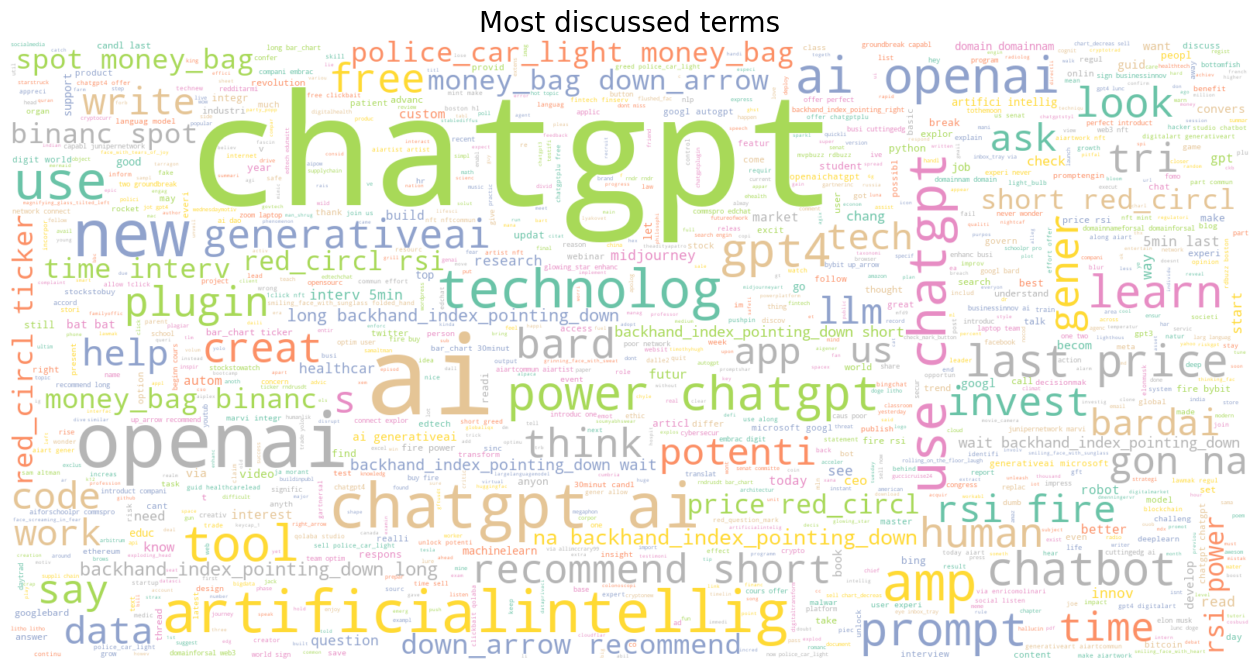

In [ ]:
wordcloud(df['text'])

In [29]:
sentiments_textblob = textblob(df['text'])

sentiments_textblob

[0.0,
 -0.33181818181818185,
 -0.0125,
 -0.4,
 -0.48333333333333334,
 -0.0125,
 0.0,
 -0.0125,
 0.0,
 -0.0125,
 0.18333333333333335,
 0.04999999999999999,
 0.0,
 0.0,
 0.0,
 -0.01,
 -0.0125,
 0.0,
 0.55,
 0.0,
 -0.5,
 0.06666666666666667,
 -0.01,
 0.0,
 0.4,
 0.0,
 -0.0375,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0125,
 0.0,
 0.2,
 0.0,
 -0.4,
 0.0,
 0.10000000000000002,
 0.0,
 0.0,
 -0.0125,
 -0.01,
 0.4,
 -0.09047619047619049,
 0.475,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.4,
 0.0,
 -0.5,
 -0.3333333333333333,
 0.0,
 -0.16666666666666666,
 -0.0125,
 -0.39999999999999997,
 0.13636363636363635,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.25,
 0.274025974025974,
 0.1875,
 -0.006696428571428575,
 0.1,
 -0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.1,
 0.0,
 0.0,
 0.0,
 -0.04242424242424244,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34545454545454546,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,

In [30]:
sentiments_roberta = roberta(df['text'])

sentiments_roberta

KeyboardInterrupt: 

In [31]:
features_df = pd.DataFrame()

features_df['sent_length'] = get_sentence_length(df['text'])


In [32]:
features_df['word_count'] = word_count(df['text'])

In [33]:
features_df['space_count'] = space_count(df['text'])

In [34]:
features_df['verb_count'] = verb_count(df['text'])

In [35]:
features_df['A_word_count'] = count_words_with_A_start(df['text'])

In [36]:
count_vectorizer(df['text'])

<500x2899 sparse matrix of type '<class 'numpy.int64'>'
	with 7941 stored elements in Compressed Sparse Row format>

In [37]:
tfidf_vectorizer(df['text'])

<500x2899 sparse matrix of type '<class 'numpy.float64'>'
	with 7941 stored elements in Compressed Sparse Row format>

In [ ]:
word2vec = word2vec(df['text'])

In [ ]:
features_df['labels'] = [1 if i >= 0.5 else 0 if i <= -0.5 else 2 for i in sentiments_textblob] # 1 is positive 0 is negative and 2 is neutral

In [ ]:
correlations(features_df) # i will not be using the correlations as they are giving me negative correlations

In [ ]:
count_vect = count_vectorizer(df['text'])
count_vect_df = pd.DataFrame(count_vect.toarray(), count_vect.get_feature_names())

count_vect_df